<h1 style="color:#1bffcf">
Code file for running the prediction algorithm for various business problems
</h1>

<h4 style="color:#add48a">
First, I will be importing necessary packages and loading the excel data with openpyxl
</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("/Users/jatin/Documents/Jatin/DS_Projects/MLResearch/Sales Prediction Dataset/advertising_sales_data.xlsx")

<h4 style="color:#add48a">
Getting to know more about the data I have to work with, using info() and head() pandas methods
</h4>


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
print(data.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


<h4 style="color:#add48a">
Next looking for descriptive statistics regarding the data with describe() method
</h4>


In [4]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  198.000000  200.000000  200.000000
mean   147.042500   23.260606   30.554000   15.130500
std     85.854236   14.921914   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.925000   12.750000   11.000000
50%    149.750000   22.400000   25.750000   16.000000
75%    218.825000   36.575000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


<h4 style="color:#add48a">
Remove the categorical campaign column
</h4>

In [10]:
data_numeric = data.drop(columns=['Campaign'])

<h4 style="color:#add48a">
Checking for NA values, and their count
</h4>

In [15]:
missing_values = data_numeric.isna().sum().sum()
total_values = data_numeric.size
print(f"Total missing values: {missing_values} out of {total_values} total values")

Total missing values: 2 out of 800 total values


<h4 style="color:#add48a">
Since there are only 2 missing values out of 800, we can remove those entries
</h4>

In [16]:
data_numeric = data_numeric.dropna()

<h3 style="color:#24e1a2">
1. Average amount spent on TV advertising
</h3>


In [5]:
average_tv_ad_spent = data['TV'].mean()
print(f"Average amount spent on TV advertising: {average_tv_ad_spent}")

Average amount spent on TV advertising: 147.0425


<h3 style="color:#24e1a2">
2. Correlation between radio advertising expenditure and product sales
</h3>


In [6]:
correlation_radio_sales = data[['Radio', 'Sales']].corr().iloc[0,1]
print(f"Correlation between Radio advertising expenditure and Sales: {correlation_radio_sales}")

Correlation between Radio advertising expenditure and Sales: 0.34972771292078386


<h3 style="color:#24e1a2">
3. Advertising medium with highest impact on sales
</h3>

In [11]:
correlations = data_numeric.corr()['Sales'].drop('Sales')
highest_impact_ad = correlations.idxmax()
print(f"Advertising medium with highest impact on sales: {highest_impact_ad}")


Advertising medium with highest impact on sales: TV


<h3 style="color:#24e1a2">
4. Linear regression model to predict sales
</h3>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_numeric[['TV', 'Radio', 'Newspaper']]
y = data_numeric['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

<h4 style="color:#add48a">
Running model prediction code
</h4>

In [ ]:
y_pred = model.predict(X_test)

<h4 style="color:#add48a">
Actual vs Predicted Sales Visualisation
</h4>

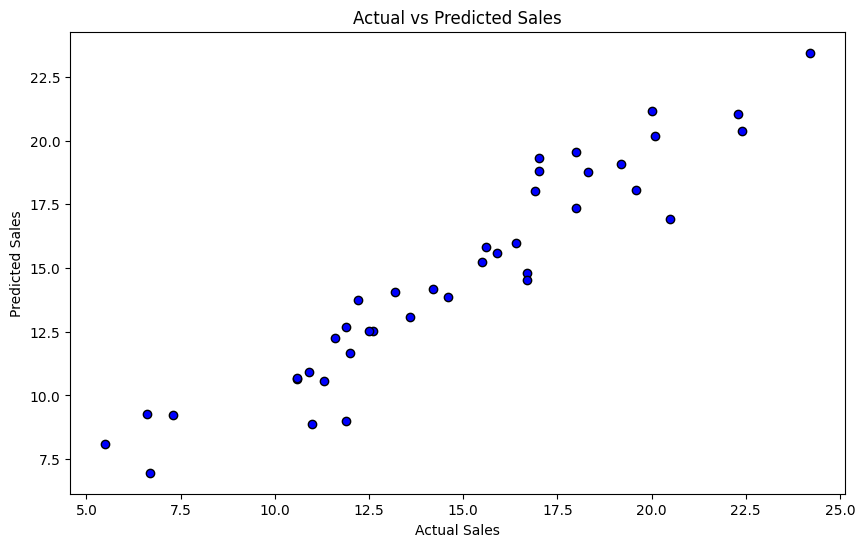

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

<h4 style="color:#add48a">
Model performance score
</h4>

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 2.018623897648978
R-squared Score: 0.89910282638328


<h3 style="color:#24e1a2">
5. Predict sales for given expenditures
</h3>

In [20]:
test_input = np.array([[200, 40, 50]])
predicted_sales = model.predict(test_input)[0]
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales}")

Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: 19.819584098134875


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h3 style="color:#24e1a2">
6. Effect of normalization
</h3>

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h3 style="color:#24e1a2">
7. Impact of using only Radio and Newspaper as predictors
</h3>

In [22]:
X_reduced = data_numeric[['Radio', 'Newspaper']]
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = LinearRegression()
model_reduced.fit(X_train_red, y_train)
y_pred_reduced = model_reduced.predict(X_test_red)

mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f"MSE using only Radio & Newspaper: {mse_reduced}")
print(f"R-squared Score using only Radio & Newspaper: {r2_reduced}")

MSE using only Radio & Newspaper: 21.045362133902053
R-squared Score using only Radio & Newspaper: -0.05191341464060373
